# **Author: Sanjay Kazi**
## Task_2: Prediction using Supervised ML
# ***GRIP*** @ The Spark Foundation
In the second task TSF provides hands on practice to interns to get a basic idea of Unsupervised ML algorithms. In this K-means clustering task I have tried to predict the optimum number of clusters and represent it visually from the inbuilt ‘Iris’ dataset. At last we will use different performance metrics to see how good our model predicts from unseen data.

## Importing Libraries

In [100]:
# Importing all libraries required in this notebook
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets
from sklearn.cluster import KMeans
import matplotlib.patches as mpatches
import sklearn.metrics as sm
from mpl_toolkits.mplot3d import Axes3D
from scipy.cluster.hierarchy import linkage,dendrogram
from sklearn.cluster import DBSCAN 
from sklearn.decomposition import PCA

## Loading Data

In [101]:
# Load the iris dataset
iris = datasets.load_iris()
iris_df = pd.DataFrame(iris.data, columns = iris.feature_names)
iris_df.head() # See the first 5 rows
x = pd.DataFrame(iris.data, columns=['Sepal Length', 'Sepal Width', 'Petal Length', 'Petal Width'])
y = pd.DataFrame(iris.target, columns=['Target'])
print(type(x))

<class 'pandas.core.frame.DataFrame'>


## Finding the optimal K value using elbow method

C:\Users\sanja\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


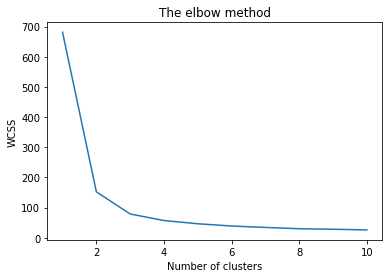

In [102]:
# Finding the optimum number of clusters for k-means classification

X = iris_df.iloc[:, [0, 1, 2, 3]].values

from sklearn.cluster import KMeans
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', 
                    max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
    
# Plotting the results onto a line graph, 
# `allowing us to observe 'The elbow'

plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') # Within cluster sum of squares
plt.show()

#### ***It is clearly evident that the within cluster sum of squares (WCSS) doesn't decrease significantly with every iteration after 3 number of clusster which suggests us that 3 clusters are optimal for this data.***

## Creating Kmeans cluster

In [103]:
# Applying kmeans to the dataset / Creating the kmeans classifier
kmeans = KMeans(n_clusters = 3, init = 'k-means++',
                max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(X)
model = kmeans.fit(x)
y_pred = np.choose(model.labels_, [1, 0, 2]).astype(np.int64)
print(type(y_kmeans))

<class 'numpy.ndarray'>


In [104]:
print(type(x))

<class 'pandas.core.frame.DataFrame'>


In [116]:
print(model.cluster_centers_.shape)

(3, 4)


## Data Visualization



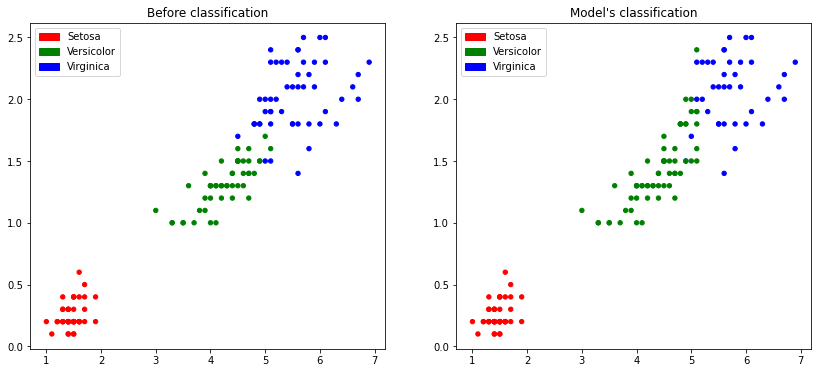

In [127]:
plt.figure(figsize=(14,6))
import matplotlib.patches as mpatches
colors = np.array(['red', 'green', 'blue'])
red_patch = mpatches.Patch(color='red', label='Setosa')
green_patch = mpatches.Patch(color='green', label='Versicolor')
blue_patch = mpatches.Patch(color='blue', label='Virginica')


plt.subplot(1, 2, 1)
plt.scatter(x['Petal Length'], x['Petal Width'],s=19, c=colors[y['Target']])
plt.title('Before classification')
plt.legend(handles=[red_patch, green_patch, blue_patch])

plt.subplot(1, 2, 2)
plt.scatter(x['Petal Length'], x['Petal Width'],s=19, c=colors[y_pred])
plt.title("Model's classification")
plt.legend(handles=[red_patch, green_patch, blue_patch])




In [106]:
import sklearn.metrics as sm
sm.accuracy_score(y_pred, y.values)

0.8933333333333333

In [107]:
sm.confusion_matrix(y_pred, y.values)

array([[50,  0,  0],
       [ 0, 48, 14],
       [ 0,  2, 36]], dtype=int64)

The acccuracy_score is a classification performance metric which tells about how robust the prediction has been made. Another metric used in 

# **Summary**
#### The unsupervised prediction model is built successfully and I was able to make beautiful clusters out of the unknown data.

# **Thank You!!! :)**